## Вариант №29, Суханов Макар БПИ-20-01 ##

### Исходные данные: ####

In [1]:
import numpy as np
import pandas as pd
data = {"X":[ 2.12476003, 3.59304225, 3.01525881, 4.63684781, 1.64640156, 1.70792005,
0.74915913, 0.86164757, 1.4326255 ,-0.66991672, 3.35472519, 3.00982864,
2.60029427, 2.08802881, 2.65874574, 3.41198804, 2.37362961, 2.00860113,
1.48404563, 3.46280213, 6.63396282, 8.21529689, 7.37542611, 7.68120241,
8.0856252 , 7.81215581, 8.31158893, 7.45896227, 7.68552979, 7.43790345,
7.40220367, 8.16009144, 8.22674257, 8.9932873 , 8.4742343 , 8.13706114,
8.10101473, 7.73011139, 7.64210272, 7.13475014,13.29192475,13.19527519,
13.40974926,12.62732322,13.35241731,13.18931899,12.22678513,11.45860992,
13.49381347,14.01686761,12.54715647,13.74586357,12.83951626,12.06680403,
13.47159805,12.67507831,12.98367391,12.59380782,13.10900137,11.24167289],
"Y":[ 4.98339709, 4.17312497, 5.36460182, 4.50692341, 5.81521067, 4.99400642,
5.21275327, 5.24387431, 5.69110539, 4.89816739, 5.60038513, 5.3207575 ,
5.15298958, 6.47637315, 5.54732859, 4.72495041, 5.779159 , 5.15881338,
5.52535125, 5.12604843, 1.25582627, 1.99321578, 0.91343199, 0.36792626,
1.45049426, 0.66143885, 1.37598474, 0.94983234, 0.12263086, 1.49114935,
2.0567719 , 1.15017213, 0.80320996, 1.81814435, 1.54644744, 1.25038885,
-0.17931791, 1.51642107, 1.78516941, 1.54386154, 9.10927168,11.88693943,
9.45553744,10.5423465 ,10.42536612,10.58046866,11.1197718 , 9.25623568,
10.20280941, 7.06271417,10.4065526 , 9.74646029,11.40156886, 9.70090844,
11.44795568,10.55450137,10.27877844,12.03400095,10.15686659,12.58239504],
"class":['Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1',
'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1',
'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group2', 'Group2', 'Group2',
'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2',
'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2',
'Group2', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3',
'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3',
'Group3', 'Group3', 'Group3', 'Group3', 'Group3'] }

dataFrame = pd.DataFrame(data)
print(dataFrame)

            X          Y   class
0    2.124760   4.983397  Group1
1    3.593042   4.173125  Group1
2    3.015259   5.364602  Group1
3    4.636848   4.506923  Group1
4    1.646402   5.815211  Group1
5    1.707920   4.994006  Group1
6    0.749159   5.212753  Group1
7    0.861648   5.243874  Group1
8    1.432626   5.691105  Group1
9   -0.669917   4.898167  Group1
10   3.354725   5.600385  Group1
11   3.009829   5.320758  Group1
12   2.600294   5.152990  Group1
13   2.088029   6.476373  Group1
14   2.658746   5.547329  Group1
15   3.411988   4.724950  Group1
16   2.373630   5.779159  Group1
17   2.008601   5.158813  Group1
18   1.484046   5.525351  Group1
19   3.462802   5.126048  Group1
20   6.633963   1.255826  Group2
21   8.215297   1.993216  Group2
22   7.375426   0.913432  Group2
23   7.681202   0.367926  Group2
24   8.085625   1.450494  Group2
25   7.812156   0.661439  Group2
26   8.311589   1.375985  Group2
27   7.458962   0.949832  Group2
28   7.685530   0.122631  Group2
29   7.437

###  Выполнить предобработку данных согласно примеру: ###
**1. Разделение входных и выходных переменных:**

In [2]:
#создадим набор входных данных
X = np.c_[data["X"], data["Y"]]

**2. Нормирование входных данных:**

In [3]:
xmin = np.min(X)
Xnorm = (X - xmin) / (np.max(X) - xmin)

**3.Кодирование выходных данных:**

In [4]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False)
Yenc = ohe.fit_transform( np.array(data["class"]).reshape(-1,1) )

#проверим размерность входных и выходных данных
print(f"Форма тензора X: {Xnorm.shape}")
print(f"Форма тензора Y: {Yenc.shape}")

Форма тензора X: (60, 2)
Форма тензора Y: (60, 3)


**4. Разбиение данных на обучающий и тестовый наборы**

In [5]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(Xnorm, Yenc, test_size = 0.25)

print("Тестовый набор:")
print(f"Форма тензора Xtest: {xTest.shape}")
print(f"Форма тензора Ytest: {yTest.shape}")

print("Обучающий набор:")
print(f"Форма тензора Xtrain: {xTrain.shape}")
print(f"Форма тензора Ytrain: {yTrain.shape}")

Тестовый набор:
Форма тензора Xtest: (15, 2)
Форма тензора Ytest: (15, 3)
Обучающий набор:
Форма тензора Xtrain: (45, 2)
Форма тензора Ytrain: (45, 3)


### 2. С помощью Tensorflow или пакета Neuralnet в R построить нейронную сеть и обучить ее на обучающем наборе. ###

In [6]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential( [
Dense( units = 4, activation = "relu", input_shape = (2,) ),
Dense( units = 4, activation = "relu"),
Dense( units = yTrain.shape[1], activation = "sigmoid" )
] )
model.compile( optimizer = "adam", loss = "categorical_crossentropy", metrics = ["categorical_accuracy"] )
model.summary()

2023-10-25 13:46:40.344842: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 13:46:40.384722: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-25 13:46:40.384774: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-25 13:46:40.384812: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-25 13:46:40.392378: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 13:46:40.393195: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 47 (188.00 Byte)
Trainable params: 47 (188.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Обучим нейронную сеть ###

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1028 - categorical_accuracy: 0.0889
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 1.0992 - categorical_accuracy: 0.0889
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 1.0957 - categorical_accuracy: 0.0889
Epoch 4/100
5/5 [==============================] - 0s 897us/step - loss: 1.0923 - categorical_accuracy: 0.0889
Epoch 5/100
5/5 [==============================] - 0s 839us/step - loss: 1.0891 - categorical_accuracy: 0.3556
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 1.0860 - categorical_accuracy: 0.3556
Epoch 7/100
5/5 [==============================] - 0s 981us/step - loss: 1.0831 - categorical_accuracy: 0.3556
Epoch 8/100
5/5 [==============================] - 0s 887us/step - loss: 1.0803 - categorical_accuracy: 0.3556
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 1.0775 - categorical_accuracy: 0.3556
Epoch 10/10

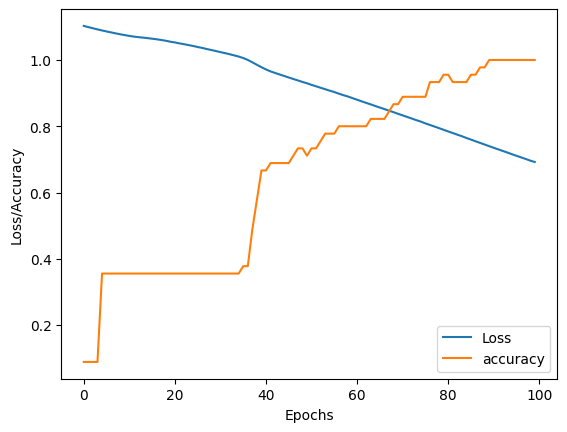

1/1 [==============================] - 0s 74ms/step - loss: 0.7405 - categorical_accuracy: 0.9333


[0.7404886484146118, 0.9333333373069763]

In [7]:
hist = model.fit( x = xTrain, y = yTrain, epochs = 100, batch_size = 10 )
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label = "Loss")
plt.plot(hist.history["categorical_accuracy"], label = "accuracy")
plt.ylabel("Loss/Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()
model.evaluate(xTest, yTest)

**Для обучения модели было выбрано кол-во эпох равное 100, так как 80ти эпох не хватало для полной картинры обучения.
По результатам обучения, можно увидеть, что продуктивность модели увеличивалась на протяжении всего обучения - тк доля accurancy на 40ой эпохе резко пошла вверх. На 100ой эпохе доля правильно предсказанных значений составила - 100%**

### Оценим работу модели на тестовой выборке: ###

In [8]:
match = 0
for i in range(len(xTest)):
    x = xTest[i]
    y = yTest[i]
    #преобразуем вектор к двумерному тензору 
    yPred = model.predict( x.reshape(1,-1) )
    #найдем индекс нейрона с максимальным сигналом
    maxLogit = np.argmax(yPred)
    #Найдем индекс правильного ответа
    yAct = np.argmax(y)
    if maxLogit == yAct:
        match += 1
        print(f"Распознали как группу {ohe.categories_[0][maxLogit]} на самом деле: {ohe.categories_[0][yAct]}" )
        print(f"Верно распознано {match} из {len(xTest)}")

1/1 [==============================] - 0s 52ms/step
Распознали как группу Group2 на самом деле: Group2
Верно распознано 1 из 15
1/1 [==============================] - 0s 14ms/step
Распознали как группу Group1 на самом деле: Group1
Верно распознано 2 из 15
1/1 [==============================] - 0s 14ms/step
Распознали как группу Group1 на самом деле: Group1
Верно распознано 3 из 15
1/1 [==============================] - 0s 13ms/step
Распознали как группу Group2 на самом деле: Group2
Верно распознано 4 из 15
1/1 [==============================] - 0s 14ms/step
Распознали как группу Group3 на самом деле: Group3
Верно распознано 5 из 15
1/1 [==============================] - 0s 15ms/step
Распознали как группу Group3 на самом деле: Group3
Верно распознано 6 из 15
1/1 [==============================] - 0s 16ms/step
Распознали как группу Group2 на самом деле: Group2
Верно распознано 7 из 15
1/1 [==============================] - 0s 15ms/step
Распознали как группу Group1 на самом деле: Group1
В

**Можно увидеть, что при последнем тестировании, модель сделала правильные предсказания для 14 элементов из 15 в тестовом наборе данных. Это хороший показатель точности для модели, и это указывает на то, что она хорошо справляется с задачей на тестовых данных.**